In [2]:
from deepSculpt.sculptor import Sculptor
from deepSculpt.plotter import Plotter
from deepSculpt.encoder import Encoder
from deepSculpt.decoder import Decoder

# from deepSculpt.params import *
# from deepSculpt.model import Generative_Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

STYLE = "#ffffff"

%load_ext autoreload
%autoreload 2

In [3]:
void_dim = 48 # greenyellow, chartreuse, mediumpurple, orange, crimson, turquoise, gold

sculptor = Sculptor(void_dim = void_dim,
                    n_edge_elements = 0,
                    n_plane_elements = 1,
                    n_volume_elements = 5,
                    color_edges = "dimgrey",
                    color_planes = "snow",
                    color_volumes = ["crimson", "turquoise", "gold", "greenyellow","mediumpurple"],
                    element_edge_min= int(void_dim*0.8),
                    element_edge_max = int(void_dim*0.9),
                    element_grid_min = int(void_dim*0.9),
                    element_grid_max = int(void_dim*0.95),
                    element_plane_min = int(void_dim*0.4),
                    element_plane_max = int(void_dim*0.8),
                    element_volume_min = int(void_dim*0.2),
                    element_volume_max = int(void_dim*0.5),
                    step = 1,
                    verbose = False)

sculpture = sculptor.generative_sculpt()

# sculptor.plot_sculpture()

Time for sculptures is 0.015885591506958008 sec


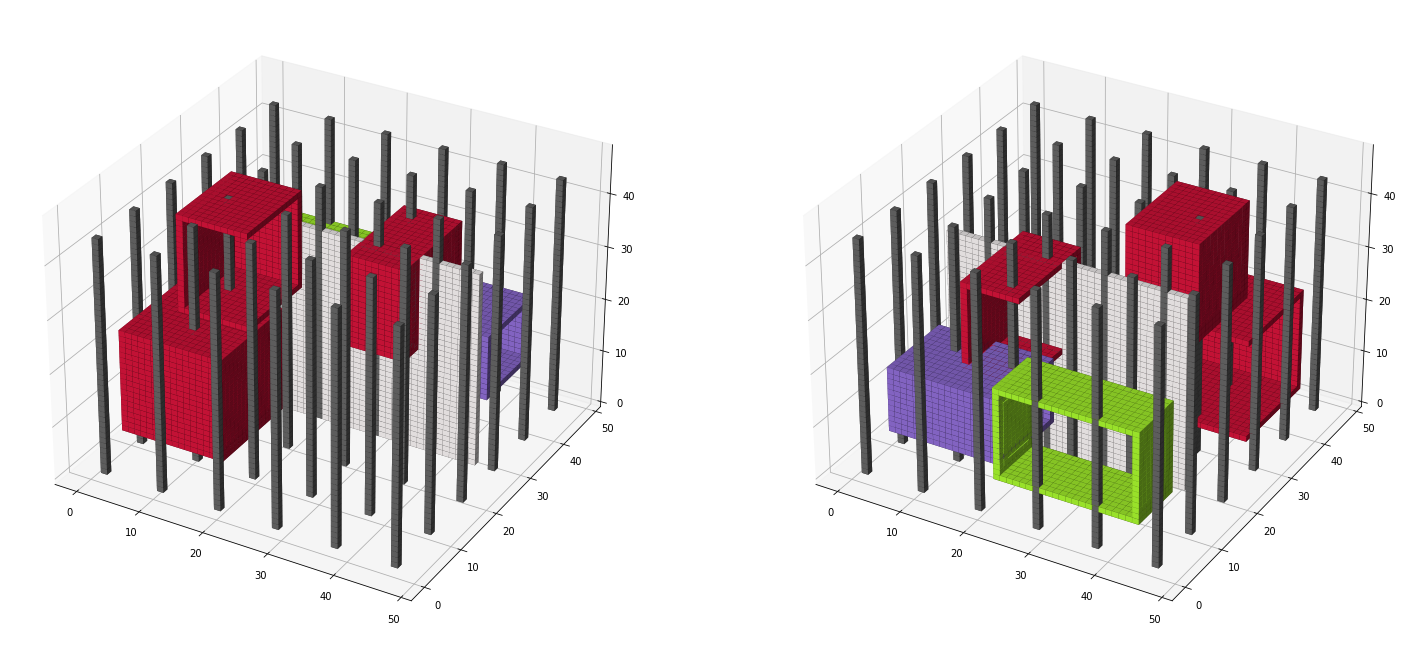

In [4]:
plotter = Plotter(sculpture, "#ffffff")

plotter.plot_sculpture()

In [36]:
encoder = Encoder(sculpture[1])

encoded_output = encoder.encoder()

In [31]:
encoded_output[0].shape

(144, 48, 48)

In [32]:
encoded_output[1]

array(['crimson', 'dimgrey', 'gold', 'greenyellow', 'mediumpurple',
       'snow', 'turquoise', None], dtype=object)

In [33]:
decoder = Decoder(encoded_output[0], encoded_output[1], 48)

In [34]:
decoder_output = decoder.decoder()

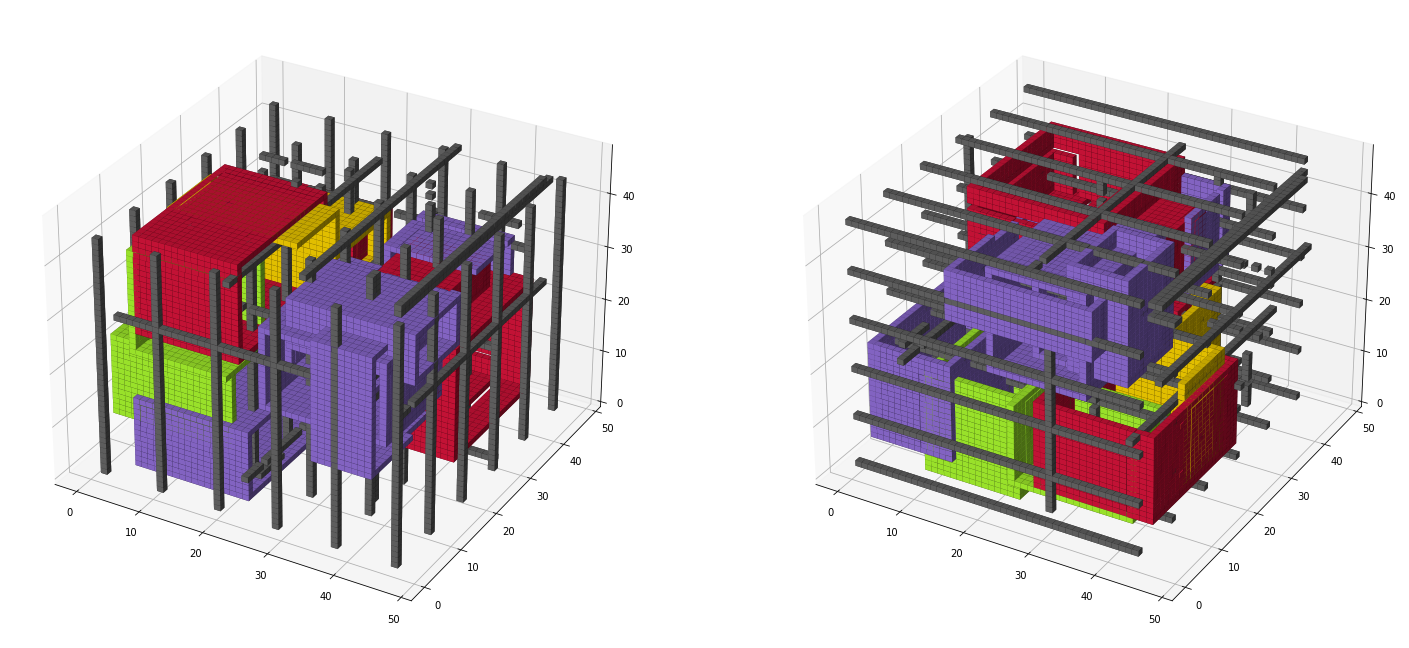

In [35]:
plotter = Plotter(decoder_output, "#ffffff")

plotter.plot_sculpture()

In [ ]:
from voxelfuse.voxel_model import VoxelModel
from voxelfuse.mesh import Mesh
from voxelfuse.primitives import generateMaterials

model = VoxelModel(sculpture[0], generateMaterials(4))  #4 is aluminium.
mesh = Mesh.fromVoxelModel(model)
mesh.export('mesh.stl')